# Topic modeling is an unsupervised la used for classifying,searching,understanding documents

In [ ]:
import pandas as pd
import os

In [ ]:
papers=pd.read_csv('/content/drive/MyDrive/Sem2/NLP/Project/papers.csv')

papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [ ]:
papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7241 non-null   int64 
 1   year        7241 non-null   int64 
 2   title       7241 non-null   object
 3   event_type  2422 non-null   object
 4   pdf_name    7241 non-null   object
 5   abstract    7241 non-null   object
 6   paper_text  7241 non-null   object
dtypes: int64(2), object(5)
memory usage: 396.1+ KB


In [ ]:
papers=papers.drop(columns=['id','event_type','pdf_name'],axis=1).sample(500)
papers.head()

,year,title,abstract,paper_text
4058,2012,Ancestor Sampling for Particle Gibbs,We present a novel method in the family of par...,Ancestor Sampling for Particle Gibbs\n\nFredri...
6288,2017,PredRNN: Recurrent Neural Networks for Predict...,The predictive learning of spatiotemporal sequ...,PredRNN: Recurrent Neural Networks for Predict...
7109,1993,"The ""Softmax"" Nonlinearity: Derivation Using S...",Abstract Missing,"The ""Softmax"" Nonlinearity:\nDerivation Using ..."
1655,2003,Measure Based Regularization,Abstract Missing,Measure Based Regularization\n\nOlivier Bousqu...
5310,2015,Policy Evaluation Using the ?-Return,We propose the ?-return as an alternative to t...,Policy Evaluation Using the ?-Return\n\nScott ...


In [ ]:
import re

papers['paper_text_processed']=papers['paper_text'].map(lambda x: re.sub(r'[,\.?!]','',x))

papers['paper_text_processed']=papers['paper_text'].map(lambda x: x.lower())

papers['paper_text_processed'].head()

4058    ancestor sampling for particle gibbs\n\nfredri...
6288    predrnn: recurrent neural networks for predict...
7109    the "softmax" nonlinearity:\nderivation using ...
1655    measure based regularization\n\nolivier bousqu...
5310    policy evaluation using the ?-return\n\nscott ...
Name: paper_text_processed, dtype: object

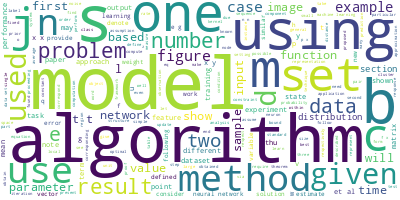

In [ ]:
from wordcloud import WordCloud

long_string=','.join(list(papers['paper_text_processed'].values))
wordcloud=WordCloud(background_color="white",max_words=5000,contour_width=3,contour_color='steel-blue')

wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words=stopwords.words('english')
stop_words.extend(['from','subject','re','edu','use'])

def sent_to_words(sentences):
  for sentence in sentences:
    # deacc=True removes punctuations
    yield(simple_preprocess(str(sentence),deacc=True))

def remove_stopwords(texts):
  return[[word for word in simple_preprocess(str(doc))
  if word not in stop_words]for doc in texts]

data=papers.paper_text_processed.values.tolist()
data_words=list(sent_to_words(data)) #tokenization

data_words=remove_stopwords(data_words) #stopword remove




In [ ]:
print(data_words[:1][0][:30])

['ancestor', 'sampling', 'particle', 'gibbs', 'fredrik', 'lindsten', 'div', 'automatic', 'control', 'link', 'oping', 'university', 'lindsten', 'isy', 'liu', 'se', 'michael', 'jordan', 'dept', 'eecs', 'statistics', 'university', 'california', 'berkeley', 'jordan', 'cs', 'berkeley', 'thomas', 'sch', 'div']


In [ ]:
import gensim.corpora as corpora
#Create dictionary
id2word=corpora.Dictionary(data_words)
#corpus
texts=data_words

#term frequency count
corpus=[id2word.doc2bow(text)for text in texts]

print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 5), (4, 1), (5, 3), (6, 4), (7, 4), (8, 1), (9, 1), (10, 1), (11, 1), (12, 3), (13, 1), (14, 4), (15, 3), (16, 1), (17, 2), (18, 2), (19, 1), (20, 6), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1)]


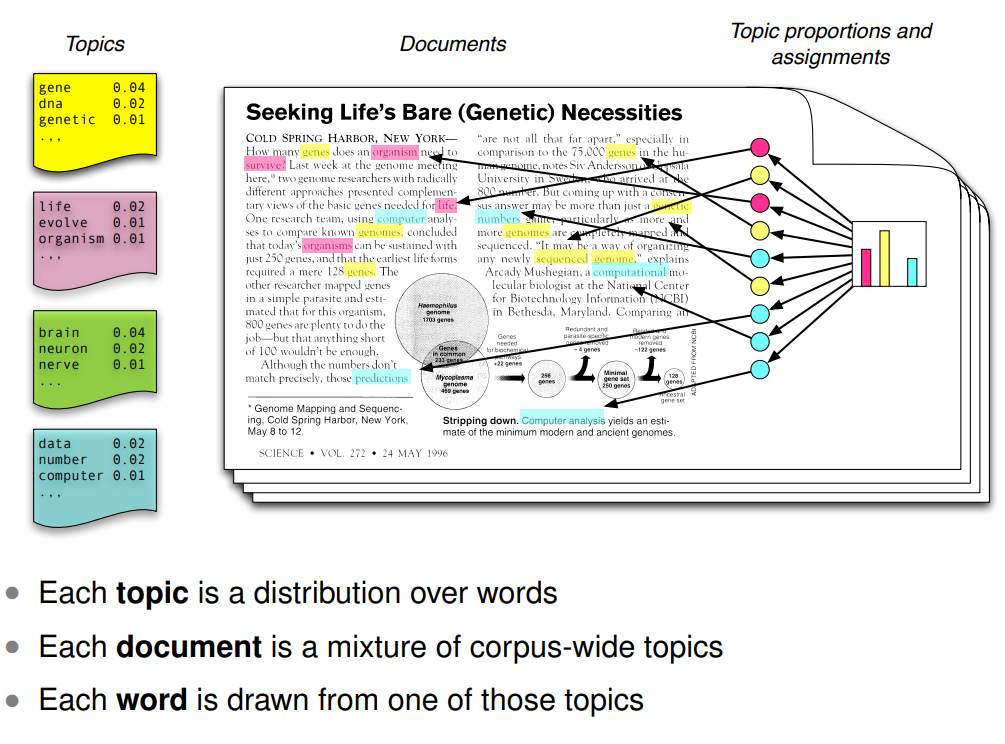

In [ ]:
from pprint import pprint

num_topics=5

lda_model=gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=num_topics,passes=10)
#passes define the passes through the corpus
#iterations,optimizes the parameters



In [ ]:
pprint(lda_model.print_topics()) #topics/themes of a corpus and its high probability words
doc_lda=lda_model[corpus]

[(0,
  '0.006*"learning" + 0.005*"training" + 0.005*"data" + 0.005*"network" + '
  '0.004*"input" + 0.004*"two" + 0.004*"set" + 0.004*"figure" + 0.004*"using" '
  '+ 0.004*"model"'),
 (1,
  '0.005*"model" + 0.005*"time" + 0.004*"algorithm" + 0.004*"data" + '
  '0.004*"learning" + 0.004*"function" + 0.004*"using" + 0.004*"distribution" '
  '+ 0.004*"one" + 0.004*"set"'),
 (2,
  '0.011*"data" + 0.008*"model" + 0.005*"set" + 0.005*"learning" + '
  '0.004*"using" + 0.004*"matrix" + 0.004*"algorithm" + 0.004*"distribution" + '
  '0.004*"function" + 0.004*"one"'),
 (3,
  '0.009*"algorithm" + 0.005*"learning" + 0.005*"problem" + 0.005*"function" + '
  '0.004*"log" + 0.004*"algorithms" + 0.004*"convex" + 0.004*"set" + '
  '0.004*"error" + 0.003*"optimization"'),
 (4,
  '0.009*"learning" + 0.009*"model" + 0.005*"state" + 0.005*"time" + '
  '0.004*"using" + 0.004*"training" + 0.004*"data" + 0.004*"policy" + '
  '0.004*"function" + 0.004*"neural"')]


In [ ]:

other_texts=['Researchers at the Indian Institute of Technology Madras recently developed the ‘GBMDriver’ (GlioBlastoma Mutiforme Drivers), a machine learning-based computational tool for enhanced identification of cancer-causing tumours in the brain and spinal cord.The GBMDriver, a freely accessible web server, was developed primarily to identify driver mutations and passenger mutations (neutral mutations) in Glioblastoma, a rapid and aggressively proliferating tumour in the brain and spinal cord, as well as other types of Cancer.']

data_words=list(sent_to_words(other_texts))
data_words=remove_stopwords(data_words)
other_corpus = [id2word.doc2bow(text) for text in data_words]

unseen_doc=other_corpus[0]
vector=lda_model[unseen_doc]
vector #document belonging which themes and with what probability

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 0.69789594), (2, 0.14633034), (4, 0.1456256)]

In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis

In [ ]:
pyLDAvis.enable_notebook()

LDavis_prepared=pyLDAvis.gensim.prepare(lda_model,corpus,id2word)

LDavis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.013813 -0.019425       1        1  23.731523
0      0.064504 -0.049941       2        1  22.893380
3     -0.076775 -0.003985       3        1  20.918104
4      0.049298  0.059989       4        1  16.451925
1     -0.023214  0.013361       5        1  16.005069, topic_info=         Term         Freq        Total Category  logprob  loglift
2581   policy   985.000000   985.000000  Default  30.0000  30.0000
777     state  2104.000000  2104.000000  Default  29.0000  29.0000
518     model  6687.000000  6687.000000  Default  28.0000  28.0000
1778   convex  1323.000000  1323.000000  Default  27.0000  27.0000
445    latent   960.000000   960.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
259     error   446.477840  2828.313122   Topic5  -6.0571  -0.0138
863      used   465.759230  3231.877999   Topic5  -6.0148  -0.1049
691   results   448.524869  3175.996574   Topic5  -6.0525  -0.1251
306     first   417.902009  2654.461646   Topic5  -6.1232  -0.0165
34       also   427.466980  3071.293762   Topic5  -6.1006  -0.1397

[487 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
2682      2  0.011906    abel
2682      3  0.964356    abel
933       1  0.009387  action
933       2  0.107008  action
933       3  0.253439  action
...     ...       ...     ...
915       1  0.239149      xt
915       2  0.038525      xt
915       3  0.207165      xt
915       4  0.416511      xt
915       5  0.098131      xt

[1212 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 5, 2])

In [ ]:
from gensim.models import CoherenceModel

coherence_model_lda=CoherenceModel(model=lda_model,texts=texts,dictionary=id2word,coherence='c_v')

coherence_lda=coherence_model_lda.get_coherence()
print('Coherence Score:',coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.289133068681114


Further Research:

Generating documents using the model.
